<h1>An analysis of Michelin stars awarded in 2020</h1>

Introduction
Import Libraries
Import Data
Reshape data


<h2>Introduction</h2>

Amongst the culinary world, there is no greater accolade than a restaurant being awarded a Michelin star (or three!). Foodies and fine dine lovers, like myself, see the expereince of dining at one of these award winning restaurants, as just that, an experience, and we take to looking at guides such as the Good Food Guide to help us determine which restaurant is next worth visting.
    
The guide states the following definitions for each of the michelin star awards:
<p>One star: "a very good restaurant"</p>
<p>Two stars: "excellent cooking that is worth a detour</p>
<p>Three stars: "exceptional cuisine that is worth a special journey"</p>
    
But how exactly does the spread of michelin stars awarded look like not only across the UK, but also the world? And what more can we understand about the types of restaurants that have received these awards?


<h2>Import libraries</h2>

In [2]:
#Import relevant libraries for analysis

import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np 
import requests
import pprint
import plotly
import plotly.graph_objects as go

%matplotlib inline

#The below is for online saving of plotly figures
import os

if not os.path.exists("images"):
    os.mkdir("images") 

Extensive webscraping has been undertaken to gather the data for this project. Further info and a full breakdown of all the scraping and gathering of data can be seen <a href="https://github.com/VajihaHameed/Portfolio-MichelinGuide2020/blob/master/Michelin%202020%20-%20Webscraping%20and%20data%20gathering.ipynb">here</a>.

<h2>Import data</h2>

The data for this project, compiled as per above, is saved in multiple csv files, all with different formats, so in the following section we will import the data in a few stages, in order to most effectively merge them all together for our final dataset.

In [3]:
#Import data

#First we will import the rest of the world csvs and join them together
one_rest_world = pd.read_csv("one_star_rest_of_the_world_2020.csv")
two_rest_world = pd.read_csv("two_star_rest_of_world_2020.csv")
three_rest_world = pd.read_csv("three_star_rest_of_the_world_2020.csv")

#Insert in new column to allow us to see the number of michelin stars
one_rest_world.insert(1,"no_of_stars",1)
two_rest_world.insert(1,"no_of_stars",2)
three_rest_world.insert(1,"no_of_stars",3)

#Join csv files
my_list = [one_rest_world, two_rest_world, three_rest_world]
stars_rest_of_world = pd.concat(my_list)
stars_rest_of_world.head()

,name,no_of_stars,year,city,Country,cuisine
0,Kilian Stuba,1,2020.0,Kleinwalsertal,Austria,Creative
1,Pfefferschiff,1,2020.0,Hallwang,Austria,Classic cuisine
2,Esszimmer,1,2020.0,Salzburg,Austria,Creative
3,Carpe Diem,1,2020.0,Salzburg,Austria,Market cuisine
4,Edvard,1,2020.0,Wien,Austria,Modern cuisine


In [4]:
#Import other country csv files which are in the same format
france = pd.read_csv("france_michelin_stars_2020.csv",index_col=[0])
spain = pd.read_csv("spain_michelin_stars_2020.csv",index_col=[0])
italy = pd.read_csv("italy_michelin_stars_2020.csv",index_col=[0])
uk = pd.read_csv("uk_michelin_stars_2020.csv",index_col=[0])
us = pd.read_csv("united_states_michelin_stars_2020.csv",index_col=[0])
hongkong = pd.read_csv("hong_kong_michelin_stars_2020.csv",index_col=[0])
southkorea = pd.read_csv("south_korea_michelin_stars_2020.csv",index_col=[0])
singapore = pd.read_csv("singapore_michelin_stars_2020.csv",index_col=[0])

#Join files 
list2 = [france, spain, italy, uk , us, hongkong, southkorea, singapore]
stars_1 = pd.concat(list2)
stars_1.head()

,Country,no_of_stars,name,city,cuisine
0,France,1,Vistamar,Monte-Carlo,Modern cuisine
1,France,1,Le Blue Bay,Monte-Carlo,Creative
2,France,1,Yoshi,Monte-Carlo,Japanese
3,France,1,Le Grill,Monte-Carlo,Classic cuisine
4,France,1,Le Georges,Chartres,Modern cuisine


In [5]:
#Import the next format of country csv files which are in the same format
belgium = pd.read_csv("belgium_michelin_stars_2020.csv",index_col=[0])
germany = pd.read_csv("germany_michelin_stars_2020.csv",index_col=[0])
luxembourg = pd.read_csv("luxembourg_michelin_stars_2020.csv",index_col=[0])
netherlands = pd.read_csv("netherlands_michelin_stars_2020.csv",index_col=[0])
portugal = pd.read_csv("portugal_michelin_stars_2020.csv",index_col=[0])
switzerland = pd.read_csv("switzerland_michelin_stars_2020.csv",index_col=[0])

#Join files
list3 = [belgium, germany, luxembourg, netherlands, portugal, switzerland]
stars_2 = pd.concat(list3)
stars_2.head()

,Country,no_of_stars,name,city
0,Belgium,1,Little Paris,"chaussée de Bruxelles 89, 1410 Waterloo"
1,Belgium,1,Aux petits oignons,"chaussée de Tirlemont 260, 1370 Jodoigne"
2,Belgium,1,Carcasse,"Henri Christiaenlaan 5, 8670 Sint-Idesbald"
3,Belgium,1,Da Mimmo,"avenue du Roi Chevalier 24, 1200 Woluwe-Saint-..."
4,Belgium,1,JER,"Persoonstraat 16, 3500 Hasselt"


In [6]:
#Import Shanghai and Japan
japan = pd.read_csv("japan_michelin_stars_2020.csv",index_col=[0])
shanghai = pd.read_csv("shanghai_michelin_stars_2020.csv",index_col=[0])

<h2> Reshape data </h2>

To join all the csv files together, we need to reshape the first dataframe so that it's columns are in the same format as the others. 

In [7]:
#Move country and no_of_stars to the front and delete year
stars_rest_of_world = stars_rest_of_world.reindex(columns=['Country','no_of_stars','name', 'city', 'cuisine'])
stars_rest_of_world.head()

,Country,no_of_stars,name,city,cuisine
0,Austria,1,Kilian Stuba,Kleinwalsertal,Creative
1,Austria,1,Pfefferschiff,Hallwang,Classic cuisine
2,Austria,1,Esszimmer,Salzburg,Creative
3,Austria,1,Carpe Diem,Salzburg,Market cuisine
4,Austria,1,Edvard,Wien,Modern cuisine


The stars_2 file contains the restaurant full address as the city, so we need to split this string so that it only contains the city name.

In [8]:
stars_2.city = stars_2.city.str.split(', ').str[-1]
stars_2.city = stars_2.city.str.split(' ').str[-1]
stars_2

,Country,no_of_stars,name,city
0,Belgium,1,Little Paris,Waterloo
1,Belgium,1,Aux petits oignons,Jodoigne
2,Belgium,1,Carcasse,Sint-Idesbald
3,Belgium,1,Da Mimmo,Woluwe-Saint-Lambert
4,Belgium,1,JER,Hasselt
...,...,...,...,...
119,Switzerland,2,Ecco St. Moritz,Champfèr
120,Switzerland,2,Ecco Zürich,Zürich
121,Switzerland,3,Cheval Blanc by Peter Knogl,Basel
122,Switzerland,3,Restaurant de l'Hôtel de Ville,Crissier


<h2>Create final data frame</h2>

In [9]:
#Join all the files together and save as a final csv to work from.
final_list= [stars_rest_of_world, stars_1, stars_2, japan, shanghai]
michelin_stars_2020 = pd.concat(final_list, sort=False)

print(michelin_stars_2020.head())

   Country  no_of_stars           name            city          cuisine
0  Austria            1   Kilian Stuba  Kleinwalsertal         Creative
1  Austria            1  Pfefferschiff        Hallwang  Classic cuisine
2  Austria            1      Esszimmer        Salzburg         Creative
3  Austria            1     Carpe Diem        Salzburg   Market cuisine
4  Austria            1         Edvard            Wien   Modern cuisine


In [10]:
#Save the dataframe as a csv 
michelin_stars_2020.to_csv('final_michelin_stars_2020.csv')

In [11]:
#Import the csv file we just saved, so that we are now working from the data on the csv file.
df = pd.read_csv('final_michelin_stars_2020.csv',index_col=[0])

<h2>Diagnosis of data</h2>

Now we have our data loaded, we should clean it further.

In [12]:
df.head()

,Country,no_of_stars,name,city,cuisine
0,Austria,1,Kilian Stuba,Kleinwalsertal,Creative
1,Austria,1,Pfefferschiff,Hallwang,Classic cuisine
2,Austria,1,Esszimmer,Salzburg,Creative
3,Austria,1,Carpe Diem,Salzburg,Market cuisine
4,Austria,1,Edvard,Wien,Modern cuisine


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3299 entries, 0 to 39
Data columns (total 5 columns):
Country        3299 non-null object
no_of_stars    3299 non-null int64
name           3299 non-null object
city           3299 non-null object
cuisine        2614 non-null object
dtypes: int64(1), object(4)
memory usage: 154.6+ KB


In [14]:
#Look for null values, by counting the number of missing values in each column
pd.isnull(df).sum()

Country          0
no_of_stars      0
name             0
city             0
cuisine        685
dtype: int64

In [15]:
#Replace all the null values in cuisine with a given word
df['cuisine'] = df['cuisine'].fillna('unknown')
pd.isnull(df).sum()

Country        0
no_of_stars    0
name           0
city           0
cuisine        0
dtype: int64

In [16]:
df.duplicated()

0     False
1     False
2     False
3     False
4     False
      ...  
35    False
36    False
37    False
38    False
39    False
Length: 3299, dtype: bool

<h2>Analysis of data</h2>

Let's now finally start to explore the data further!

<h3>Restaurants</h3>

In [99]:
df.shape

(3299, 5)

There are 3,299 restaurants included in the michelin guide worldwide. 

<h3>Countries</h3>

Which countries are included?

In [100]:
countries = df.Country.unique()
country_count = df.Country.nunique()
print(countries, country_count)

['Austria' 'Croatia' 'Czech Republic' 'Denmark' 'Finland' 'Greece'
 'Hungary' 'Macau' 'Norway' 'Poland' 'Ireland' 'Brazil' 'Sweden' 'Taipei'
 'Thailand' 'France' 'Spain' 'Italy' 'UK' 'United States' 'Hong Kong'
 'South Korea' 'Singapore' 'Belgium' 'Germany' 'Luxembourg' 'Netherlands'
 'Portugal' 'Switzerland' 'Japan' 'China'] 31


There are 31 countries included in the guide.

Which of these have the most stars? Note, we will look at restaurants with stars as opposed to the number of total stars(i.e. where a restaurant has 2 stars this will only be counted once).

In [101]:
top_countries = df.groupby('Country')['no_of_stars'].count()

top_countries.nlargest(10)


Country
Japan            669
France           628
Italy            372
Germany          302
Spain            213
United States    207
UK               169
Switzerland      124
Netherlands      111
Belgium           72
Name: no_of_stars, dtype: int64

Japan leads with the most stars worldwide, with UK coming in 6th place. We want to visualise this information on a chart using Plotly.

In [102]:
#Turns the series we created earlier, into a dataframe which we can now use for visualisations
top_countries_df = df.groupby('Country')['no_of_stars'].count().reset_index() 

one_star_countries = df[df.no_of_stars == 1]
one_star_count = one_star_countries.groupby('Country').no_of_stars.count().reset_index()

two_star_countries = df[df.no_of_stars == 2]
two_star_count = two_star_countries.groupby('Country').no_of_stars.count().reset_index()

three_star_countries = df[df.no_of_stars == 3]
three_star_count = three_star_countries.groupby('Country').no_of_stars.count().reset_index()

In [103]:
#Create plotly visualisation
trace4= go.Bar( x = one_star_count['Country'],  #Create trace using the dataframe columns
             y= one_star_count['no_of_stars'],
             name = '1 star', #Name that will show in legend
             marker = dict(color = 'rgb(115,25,99)'))

trace5= go.Bar( x = two_star_count['Country'],  #Create trace using the dataframe columns
             y= two_star_count['no_of_stars'],
             name = '2 star',
             marker = dict(color = 'rgb(108,137,153)'))

trace6= go.Bar( x = three_star_count['Country'],  #Create trace using the dataframe columns
             y= three_star_count['no_of_stars'],
             name = '3 star',
             marker = dict(color = 'rgb(242,96,133)'))

trace7 = go.Bar( x = top_countries_df['Country'],  #Create trace using the dataframe columns
             y= top_countries_df['no_of_stars'],
             name = 'Total restaurants',
             marker = dict(color = 'rgb(255,178,181)'))

layout = go.Layout(barmode = "group", title='Michelin starred restaurants per country 2020',
                   xaxis= dict(title= 'Country',ticklen= 5,zeroline= False), 
                   yaxis= dict(title= 'No of restaurants',ticklen= 5,zeroline= False),
                   plot_bgcolor = 'rgb(230,230,230)',
                   showlegend=True)

data = [trace4, trace5, trace6, trace7]
fig = go.Figure(data = data,layout = layout) #Create figure
fig.write_image("images/fig1.png", width=800, height=400, scale=2)
fig.show()

We would like to take the visualisation a bit further and view the above information in a map form. We can do this again using Plotly.

In [104]:
#Change column 'name no_of_stars' to reflect aggragate better.
top_countries_df.columns = ['Country', 'no_of_restaurants']

import plotly.express as px  # Be sure to import express
fig = px.choropleth(top_countries_df,  # Input Pandas DataFrame
                    locations='Country',  # DataFrame column with locations
                    color='no_of_restaurants',  # DataFrame column with color values
                    hover_name="Country", # DataFrame column hover info
                    locationmode = 'country names',
                   color_continuous_scale=['rgb(255,178,181)', 'rgb(242,96,133)', 'rgb(115,25,99)', '#523456']) # Set to plot as world map
fig.update_layout(
    title_text = 'Michelin starred restaurants by country 2020' # Create a Title 
)

fig.write_image("images/fig2.png", scale=2)
fig.show()


In [107]:
#Pie chart of percentage of restaurants in each country in the guide

trace8 = go.Pie(labels=top_countries_df.Country, values= top_countries_df['no_of_restaurants'],name = 'Name')
data = [trace8] 

layout = go.Layout(
                   title='Percentage of michelin starred restaurants by country'
                   )
fig = go.Figure(data=data, layout=layout)
colors2 = ['rgb(255,178,181)', 'rgb(242,96,133)', 'rgb(115,25,99)','rgb(156, 106, 108)', 'rgb(280,120,160)',
                 'rgb(140,50,130)','rgb(186, 93, 97)', 'rgb(242,96,133)', 'rgb(115,25,99)','rgb(242, 201, 203)', 
          'rgb(255,178,181)', 'rgb(242,96,133)', 'rgb(115,25,99)', 'rgb(107, 44, 47)', 'rgb(242,96,133)', 
           'rgb(115,25,99)', 'rgb(209, 109, 114)', 'rgb(242,96,133)', 'rgb(115,25,99)', 'rgb(158, 100, 103)', 
           'rgb(242,96,133)', 'rgb(115,25,99)','rgb(181, 121, 124)', 'rgb(242,96,133)', 'rgb(115,25,99)',
           'rgb(255,178,181)', 'rgb(181, 121, 124)', 'rgb(242,96,133)', 'rgb(115,25,99)','rgb(181, 121, 124)', 
           'rgb(242,96,133)', 'rgb(115,25,99)']

fig.update_traces(marker = dict(colors=colors2))
fig.write_image("images/fig12.png", scale=2)
fig.show()

In [108]:
#Create new column for percentage
top_countries_df['country_percentage'] = (top_countries_df['no_of_restaurants']/top_countries_df['no_of_restaurants'].sum())*100


In [109]:
top_countries_df.head()

,Country,no_of_restaurants,country_percentage
0,Austria,19,0.575932
1,Belgium,72,2.182480
2,Brazil,18,0.545620
3,China,40,1.212489
4,Croatia,5,0.151561


<h3>Stars</h3>
We will now take a look at how many restaurants of each star there are across the guide.

In [110]:
#How many restuarants of each star across the world?
stars_world = df.groupby('no_of_stars').count()
stars_world

,Country,name,city,cuisine
no_of_stars,,,,
1,2657,2657,2657,2657
2,507,507,507,507
3,135,135,135,135


In [218]:
one_star_mich = 2657
two_star_mich = 507
three_star_mich = 135

trace20= go.Bar(name='One star',  y=[one_star_mich], marker = dict(color = 'rgb(115,25,99)'))
trace21= go.Bar(name='Two star',  y= [two_star_mich],  marker = dict(color = 'rgb(255,178,181)'))
trace22= go.Bar(name='Three star',  y=[three_star_mich], marker = dict(color = 'rgb(242,96,133)'))
 
layout = go.Layout(barmode = "stack",# Change the bar mode
          title='Breakdown of one, two and three michelin star restaurants worldwide 2020',
          xaxis= dict(title= 'Michelin stars',ticklen= 5,zeroline= False, showticklabels=False), 
          yaxis= dict(title= 'No of restaurants',ticklen= 5,zeroline= False),
          plot_bgcolor = 'rgb(230,230,230)', 
          bargap = 0.8,
          showlegend=True)

data = [trace20, trace21, trace22]  

fig = go.Figure(data = data,layout = layout) #Create figure

fig.write_image("images/fig14.png", width=800, height=400, scale=2)

fig.show()

In [222]:
#Calculate proportions
mich_one_prop = (one_star_mich/3299)*100
mich_two_prop = (two_star_mich/3299)*100
mich_three_prop = (three_star_mich/3299)*100

print(mich_one_prop, mich_two_prop, mich_three_prop)

80.53955744164898 15.368293422249165 4.092149136101849


There are 2657 (81%) one star restaurants, 507 (15%) two star and 135 (4%) three star included in the guides worldwide. It indeed does seem that gaining three stars is a very rare achievement amongst restaurants.

<h3>Cuisines</h3>

Is there a correlation between cuisines and michelin stars?

We should first find out which unique cuisines are included in the data.

In [23]:
cuisines = df.cuisine.unique()
cuisine_count = df.cuisine.nunique()
cuisines, cuisine_count

(array(['Creative', 'Classic cuisine', 'Market cuisine', 'Modern cuisine',
        'Japanese', 'Vegetarian', 'Danish', 'Thai', 'Classic French',
        'Italian', 'Finnish', 'Mediterranean', 'Seafood', 'Steakhouse',
        'Cantonese', 'Sushi', 'Indian', 'Scandinavian', 'Modern British',
        'French', 'modern', 'Asian influences', 'creative',
        'Meats and grills', 'Taiwanese', 'French contemporary',
        'Hang Zhou', 'Barbecue', 'Asian contemporary',
        'European contemporary', 'Innovative', 'Thai Contemporary',
        'Street Food', 'Hunanese and Sichuan', 'Chinese', 'Sichuan ',
        'Modern French', 'Japanese contemporary', 'Sichuan-Huai Yang',
        'Traditional cuisine', 'Greek', 'Provençal', 'Corsican', 'Mexican',
        'Contemporary', 'Fusion', 'Asian', 'Galician', 'Regional cuisine',
        'Italian contemporary', 'Emilian', 'Tuscan', 'Campanian',
        'Country', 'Apulian', 'Piedmontese', 'Cuisine from Abruzzo',
        'Mantuan', 'Traditional Bri

There are 103 cuisines types included in the data. That's a large variety! 

Note: It looks as though there are some overlaps of cuisine names. For instance we have 'French' and 'Classic French' or 'Creative British' and 'Modern British'. Let's explore this further to see if we need to make any adjustments to the data.

In [24]:
print(df[(df.cuisine=='Classic French')])

     Country  no_of_stars              name       city         cuisine
34   Denmark            1  Kong Hans Kælder  København  Classic French
108       UK            1       Masons Arms  Knowstone  Classic French
167       UK            3     Waterside Inn       Bray  Classic French


In [25]:
print(df[(df.cuisine=='French')])

    Country  no_of_stars                             name  \
89   Brazil            1                           Olympe   
11   Greece            2                           Spondi   
172   Italy            1                       Da Candida   
10       UK            1                       Chez Bruce   
22       UK            1                      Club Gascon   
..      ...          ...                              ...   
0     Japan            1                          1er Cru   
2     Japan            1  Harbor Terrace Sasebo Geihinkan   
3     Japan            1                       Impeccable   
2     Japan            1                           Corque   
2     Japan            1                           Nacrée   

                       city cuisine  
89   Rio de Janeiro - 22470  French  
11                   Athína  French  
172       CAMPIONE D'ITALIA  French  
10               Wandsworth  French  
22                   London  French  
..                      ...     ...  
0

On closer look, from above, it doesn't look like this will impact things that greatly, so we will keep these categories the same, but it is worth noting when carrying out our analysis and we may need to revsit this in teh future.

So which cuisines have the most starred restaurants?

In [26]:
stars_cuisine = df.groupby('cuisine')['no_of_stars'].count()

stars_cuisine.nlargest(10)

cuisine
Modern cuisine     708
Creative           450
Japanese           368
French             147
Sushi              110
Contemporary        86
Classic cuisine     68
Italian             56
Modern British      42
Cantonese           41
Name: no_of_stars, dtype: int64

The cuisine with the most number of starred restaurants is Modern cuisine. 

This is different from the results of cuisine with the most stars (as we haven't summed up the actual number of stars here), which we will now calculate.

In [27]:
sum_stars_cuisine = df.groupby('cuisine')['no_of_stars'].sum()
print(sum_stars_cuisine.nlargest(10))

cuisine
Modern cuisine     795
Creative           625
Japanese           484
French             182
Sushi              143
Contemporary       124
Classic cuisine     83
Italian             60
Innovative          57
Cantonese           55
Name: no_of_stars, dtype: int64


The top 10 cuisines in both sets of data are the same. The only difference is the total number of each.

We can plot this information on a scatter chart, overlaying both sets of data to be able to visualise the difference.

In [50]:
stars_cuisine_df = df.groupby('cuisine')['no_of_stars'].count().reset_index()
sum_stars_cuisine_df = df.groupby('cuisine')['no_of_stars'].sum().reset_index()

trace11 = go.Scatter(x=stars_cuisine_df['cuisine'],
                                y=stars_cuisine_df['no_of_stars'],
                                mode='markers',
                                marker = dict(color = 'rgb(255,178,181)'),
                                name ='Restaurants')

trace12 = go.Scatter(x=sum_stars_cuisine_df['cuisine'],
                                y=sum_stars_cuisine_df['no_of_stars'],
                                mode='markers',
                                marker = dict(color = 'rgb(115,25,99)'),
                                name='Stars'
                                )

data = [trace11, trace12]
layout = go.Layout(title = 'Michelin stars 2020 by cuisine',
                   xaxis= dict(title= 'Cuisine',ticklen= 5,zeroline= False), 
                   yaxis= dict(title= 'Michelin Stars',ticklen= 5,zeroline= False),
                   plot_bgcolor = 'rgb(230,230,230)',
                   showlegend = True )
fig = go.Figure(data = data, layout = layout)
fig.write_image("images/fig3.png", width = 1000, scale = 2)
fig.show()

Zoom into the chart above to see all the cuisines. There is a big difference between the two sets of data in particular for Creative, Japanese contemporary and Modern cuisine, which shows us that these cuisines most likely have more restaurants with the higher number of stars. Let's explore this further below.

We now want to know which cuisines get the highest accolade, i.e are restaurants with 3 stars of a certain cuisine?

In [55]:
#Create a new data frame for the total number of restaurants per each cuisine and star number.

one_star_cuisine = one_star_countries.groupby('cuisine').no_of_stars.count().reset_index()
one_star_cuisine.rename(columns={'no_of_stars':'1 star'}, inplace = True)

two_star_cuisine = two_star_countries.groupby('cuisine').no_of_stars.count().reset_index()
two_star_cuisine.rename(columns={'no_of_stars':'2 star'}, inplace = True)

three_star_cuisine = three_star_countries.groupby('cuisine').no_of_stars.count().reset_index()
three_star_cuisine.rename(columns={'no_of_stars':'3 star'}, inplace = True)

cuisine_stars = one_star_cuisine.merge(two_star_cuisine, how='outer').merge(three_star_cuisine, how = 'outer')

#Fill missing values with 0
cuisine_stars = cuisine_stars.fillna(value = {'1 star': 0, '2 star': 0, '3 star': 0})

cuisine_stars

,cuisine,1 star,2 star,3 star
0,American,8.0,1.0,1.0
1,Apulian,1.0,0.0,0.0
2,Asian,3.0,0.0,1.0
3,Asian contemporary,1.0,0.0,0.0
4,Asian influences,1.0,1.0,0.0
...,...,...,...,...
98,Creative French,0.0,1.0,0.0
99,Hunanese and Sichuan,0.0,1.0,0.0
100,Japanese contemporary,0.0,2.0,0.0
101,Sichuan,0.0,1.0,0.0


Now we have our new dataframe, we can take a closer look at which cuisines have 3 starred restaurants.

In [56]:
three_star_cuisine

,cuisine,3 star
0,American,1
1,Asian,1
2,Cantonese,5
3,Chinese,1
4,Classic French,1
5,Classic cuisine,2
6,Contemporary,10
7,Creative,36
8,French,6
9,French contemporary,4


In [57]:
fig = px.bar(three_star_cuisine, x='cuisine', y='3 star')
fig.update_traces(marker_color='rgb(115,25,99)', marker_line_color='rgb(8,48,107)')
                 
fig.update_layout(title_text='Three star restaurants by cuisine')  
fig.write_image("images/fig4.png", scale=2)
fig.show()

The cuisines with most 3 star restaurants (excluding unknown) are Creative, Japanese and Modern Cuisine, which is what we assumed from the previous graph.

By creating a heat map, we can visualise each cuisine against the number of restaurants with each star rating.

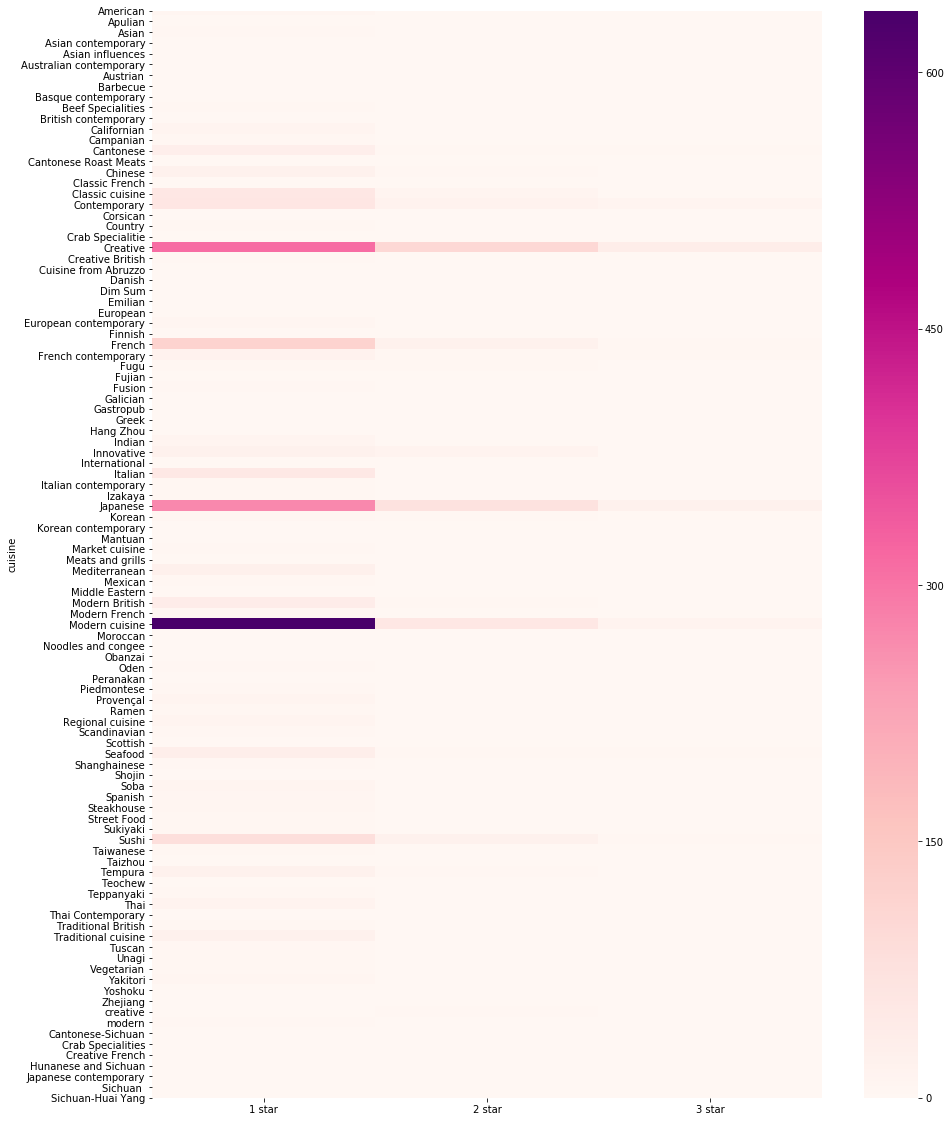

In [32]:
#Create heatmap of stars per cuisine

f,ax = plt.subplots(figsize=(15, 20))
sns.heatmap(cuisine_stars.set_index('cuisine') ,cmap = 'RdPu') #Set index to avoid error.

<h3>United Kingdom</h3>

We will now explore the United Kingdom further. How many restaurants are there of each star in the UK?

In [58]:
uk_one_star = df[(df.Country=='UK')&(df.no_of_stars==1)].\
no_of_stars.count()

uk_two_star = df[(df.Country=='UK')&(df.no_of_stars==2)].\
no_of_stars.count()

uk_three_star = df[(df.Country=='UK')&(df.no_of_stars==3)].\
no_of_stars.count()

print(uk_one_star)
print(uk_two_star)
print(uk_three_star)
           

144
20
5


There are 144 one star restaurants, 20 two star restaurants and 5 three star restaurants.

We want to now visualise this information.

In [60]:
trace8 = go.Bar(
      x = ['1 star'], y = [uk_one_star],
      marker = dict(color = 'rgb(255,178,181)')
     ) 

trace9 = go.Bar(
      x = ['2 stars'], y = [uk_two_star],
      marker = dict(color = 'rgb(115,25,99)')
      )

trace10 = go.Bar(
      x = ['3 stars'], y = [uk_three_star],
      marker = dict(color = 'rgb(242,96,133)')
      )

data= [trace8, trace9, trace10]

layout = go.Layout(title = 'Number of restaurants with michelin stars in the United Kingdom',
                   xaxis= dict(title= 'Number of stars',ticklen= 5,zeroline= False), 
                   yaxis= dict(title= 'Number of restaurants',ticklen= 5,zeroline= False),
                   plot_bgcolor = 'rgb(230,230,230)',
                   showlegend = False 
                   )

fig = go.Figure( data = data, layout = layout)
fig.write_image("images/fig6.png", scale=2)
fig.show()

The majority of michelin rated restaurants in the UK have 1 star, with a small percentage having 2 or 3 stars. We can also visualise the split of stars in a pie chart.

In [61]:
labels = ['1 star','2 stars','3 stars']
values = [uk_one_star, uk_two_star, uk_three_star]
colors = ['rgb(255,178,181)','rgb(115,25,99)', 'rgb(242,96,133)']
                                                 
layout = go.Layout(title = 'Proportion of 1,2 and 3 michelin stars across UK restaurants')
fig = go.Figure(data=[go.Pie(labels=labels, values=values)], layout = layout)

fig.update_traces(marker=dict(colors=colors))
fig.write_image("images/fig7.png", scale=2)
fig.show()

Which areas of the UK are the restaurants located?

In [62]:
uk_df = df[df.Country == 'UK']
print(uk_df.city.nunique())
uk_df.city.unique()

111


array(['Bath', 'Shoreditch', 'Hunstanton', 'Anstruther', 'Leeds',
       'Shinfield', "Saint James's", 'Kenilworth', 'London', 'Bloomsbury',
       'Wandsworth', 'Menai Bridge/Porthaethwy', 'Ripley', 'Cheltenham',
       'Birmingham', 'Bagshot', 'Lympstone', 'Whitebrook', 'Egham',
       'Lower Beeding', 'Horsham', 'Chester', 'Fulham', 'Chew Magna',
       'Kensington', 'Ascot', 'Stratford-upon-Avon', 'Mayfair',
       'Little Dunmow', 'Edinburgh', 'Dorking', 'Seasalter',
       'Machynlleth', 'Finsbury', 'Chiswick', 'Morston', 'Marylebone',
       'Hammersmith', 'Fence', 'Waternish', 'Castle Combe', 'Murcott',
       'Birkenhead', 'Whatcote', 'South Dalton', 'Mountsorrel', 'Leith',
       'Richmond upon Thames', 'Upper Hambleton', 'Cartmel', 'Askham',
       'Belgravia', 'Belfast', 'Victoria', 'Peat Inn', 'Colerne',
       'Manchester', 'Spitalfields', 'Padstow', 'Westminster', 'Eriska',
       'Harome', 'Saint Helier/Saint-Hélier', 'Oldstead', 'Bristol',
       'Hetton', 'Tenbury Wel

There are 111 different cities in the UK breakdown, however from looking at the array above, we can see that quite a large majority of these "cities" are in actual fact boroughs of London.

We will create a new column in the dataframe which will reflect the city of each restaurant. 

In [63]:
#Create a new dictionary
uk_city_dictionary = {'Bath':'Bath', 'Shoreditch':'London','Hunstanton':'Hunstanton', 'Anstruther':'Anstruther', 
'Leeds': 'Leeds','Shinfield':'Shinfield', "Saint James's":'London', 'Kenilworth':'Kenilworth', 'London':'London', 
'Bloomsbury':'London','Wandsworth':'London', 'Menai Bridge/Porthaethwy':'Menai Bridge/Porthaethwy',
'Ripley':'Ripley','Cheltenham':'London','Birmingham':'Birmingham', 'Bagshot':'Bagshot', 'Lympstone':'Lympstone',
'Whitebrook':'Whitebrook','Egham':'Egham','Lower Beeding':'Lower Beeding', 'Horsham':'Horsham', 'Chester':'Chester',
'Fulham':'London','Chew Magna':'Chew Magna','Kensington':'London', 'Ascot':'London', 
'Stratford-upon-Avon':'Stratford-upon-Avon','Mayfair':'London','Little Dunmow':'Little Dunmow',
'Edinburgh':'Edinburgh', 'Dorking':'Dorking','Seasalter':'Seasalter','Machynlleth':'Machynlleth',
'Finsbury':'London', 'Chiswick':'London', 'Morston':'Morston','Marylebone':'London','Hammersmith':'London',
'Fence':'Fence','Waternish':'Waternish','Castle Combe':'Castle Combe','Murcott':'Murcott',
'Birkenhead':'Birkenhead', 'Whatcote':'Whatcote', 'South Dalton':'South Dalton','Mountsorrel':'Mountsorrel',
'Leith':'Leith','Richmond upon Thames':'London', 'Upper Hambleton':'Upper Hambleton','Cartmel':'Catrmel', 
'Askham':'Askham','Belgravia':'London', 'Belfast':'Belfast', 'Victoria':'London', 'Peat Inn': 'Peat Inn',
'Colerne':'Colerne','Manchester':'Manchester', 'Spitalfields':'London', 'Padstow':'Padstow',
'Westminster':'London','Eriska':'Eriska','Harome':'Harome','Saint Helier/Saint-Hélier':'Saint Helier/Saint-Hélier',
'Oldstead':'Oldstead','Bristol':'Bristol','Hetton':'Hetton', 'Tenbury Wells':'Tenbury Wells','Fordwich':'Fordwich',
'City of London':'London','Bermondsey':'London', 'Torquay':'Torquay', 'Winteringham':'Winteringham', 
'Braithwaite':'Braithwaite','Winchester':'Winchester', 'Langho':'Langho', 'Clerkenwell':'London',
'Ambleside':'Ambleside',"Regent's Park":'London', 'Soho':'London', 'Broadstairs':'Broadstairs', 
'Bowness-on-Windermere':'Bowness-on-Windermere','Ilfracombe':'Ilfracombe', 'Port Isaac':'Port Isaac',
'Oxford':'Oxford', 'Knowstone':'Knowstone','Clapham Common':'London','Llanddewi Skirrid':'Llanddewi Skirrid', 
'Grasmere':'Grasmere', 'Chelsea':'London','Nottingham':'Nottingham', 'Newbury':'Newbury',
'Hampton in Arden':'Hampton in Arden', 'Bray':'Bray', 'Marlow':'Marlow','Kew':'London', 'Dalry':'Dalry',
'East Chisenbury':'East Chisenbury', 'Amersham':'Amersham', 'Gravetye':'Gravetye','Oxwich':'Oxwich',
'Newcastle upon Tyne':'Newcastle upon Tyne', 'Penarth':'Penarth', "Burchett's Green":"Burchett's Green",
'Malmesbury':'Malmesbury', 'North Kensington':'London', 'Summerhouse':'Summerhouse', 'Aughton':'Aughton',
'Auchterarder':'Auchterarder', 'Great Milton':'Great Milton', 'Cambridge':'Cambridge', 'Hyde Park':'London'}
#Replace values as per dictionary 
uk_df_amended= uk_df.replace(uk_city_dictionary)

print(uk_df_amended.city.nunique())
uk_df_amended.city.unique()

83


array(['Bath', 'London', 'Hunstanton', 'Anstruther', 'Leeds', 'Shinfield',
       'Kenilworth', 'Menai Bridge/Porthaethwy', 'Ripley', 'Birmingham',
       'Bagshot', 'Lympstone', 'Whitebrook', 'Egham', 'Lower Beeding',
       'Horsham', 'Chester', 'Chew Magna', 'Stratford-upon-Avon',
       'Little Dunmow', 'Edinburgh', 'Dorking', 'Seasalter',
       'Machynlleth', 'Morston', 'Fence', 'Waternish', 'Castle Combe',
       'Murcott', 'Birkenhead', 'Whatcote', 'South Dalton', 'Mountsorrel',
       'Leith', 'Upper Hambleton', 'Catrmel', 'Askham', 'Belfast',
       'Peat Inn', 'Colerne', 'Manchester', 'Padstow', 'Eriska', 'Harome',
       'Saint Helier/Saint-Hélier', 'Oldstead', 'Bristol', 'Hetton',
       'Tenbury Wells', 'Fordwich', 'Torquay', 'Winteringham',
       'Braithwaite', 'Winchester', 'Langho', 'Ambleside', 'Broadstairs',
       'Bowness-on-Windermere', 'Ilfracombe', 'Port Isaac', 'Oxford',
       'Knowstone', 'Llanddewi Skirrid', 'Grasmere', 'Nottingham',
       'Newbury', 'Hamp

Now we can see there are actually 83 different cities in the UK with michelin starred restaurants. Let's look at where the majority of restaurants are.

In [64]:
uk_cities = uk_df_amended.groupby('city').no_of_stars.count()
uk_cities.nlargest(10)

city
London        69
Birmingham     5
Bristol        4
Belfast        3
Bray           3
Catrmel        2
Edinburgh      2
Leith          2
Marlow         2
Newbury        2
Name: no_of_stars, dtype: int64

London by far has the most starred restaurants, with Birmingham second. What is interesting is that the bigger the city does not mean the more starred restaurants. As we owuld expect Manchester, Leeds and Sheffield to be the next in this list. However Sheffield is not included in the list at all.

We will visualise this information further in the chart below. Zoom in to see all the cities, or hover over each bar to read more info.

In [71]:
uk_cities_df = uk_df_amended.groupby('city').no_of_stars.count().reset_index()

#Rename no_of_stars column with the count aggregate to no_of_restaurants.
uk_cities_df.columns = ['city', 'no_of_restaurants']

trace11 = go.Bar(
x = uk_cities_df.city,
y = uk_cities,
marker = dict(color = 'rgb(115,25,99)')
)

data= [trace11]

layout = go.Layout(title = 'UK Michelin star breakdown by city',
                   xaxis= dict(ticklen= 5,zeroline= False), 
                   yaxis= dict(title= 'Number of restaurants',ticklen= 5,zeroline= False),
                   showlegend = False 
                   )

fig = go.Figure( data = data, layout = layout)
fig.write_image("images/fig8.png", width=900, height=400, scale=2)
fig.show()

Can we now see this data on a map?

In [72]:
#Add latitude and longititude co-ordinates to the dataframe
uk_latitude_dictionary ={'Bath':'51.380001', 'London':'51.509865', 'Hunstanton':'52.938370', 
                         'Anstruther':'56.223412', 
                         'Leeds':'53.801277', 'Shinfield':'51.405590',
       'Kenilworth':'52.349960', 'Menai Bridge/Porthaethwy':' 53.225935', 'Ripley':'53.051518', 
                         'Birmingham':'52.489471',
       'Bagshot':'51.361191', 'Lympstone':'50.647508', 'Whitebrook':'51.7561', 'Egham':'51.4288', 
                         'Lower Beeding':'51.0328',
       'Horsham':'51.0629', 'Chester':'53.189999', 'Chew Magna':'51.3670', 'Stratford-upon-Avon':'52.1917',
       'Little Dunmow':'51.8673', 'Edinburgh':'55.9533', 'Dorking':'51.2322', 'Seasalter':'51.3435',
       'Machynlleth':'52.5903', 'Morston':'52.9542', 'Fence':'54.8459', 'Waternish':'57.5099', 
                         'Castle Combe':'51.4934',
       'Murcott':'51.8373', 'Birkenhead':'53.3900', 'Whatcote':'52.0980', 'South Dalton':'53.8951', 
                         'Mountsorrel':'52.7256',
       'Leith':'55.9755', 'Upper Hambleton':'52.6586', 'Catrmel':'54.1993','Askham':'54.6060','Belfast':'54.5973',
       'Peat Inn':'56.2753', 'Colerne':'51.4399', 'Manchester':'53.4808', 'Padstow':'50.5421', 'Eriska':'56.5257',
                         'Harome':'54.2321',
       'Saint Helier/Saint-Hélier':'49.1805', 'Oldstead':'54.2086', 'Bristol':'51.4545', 'Hetton':'54.8280',
       'Tenbury Wells':'52.3077', 'Fordwich':'51.2951', 'Torquay':'50.4619', 'Winteringham':'53.6890',
       'Braithwaite':'54.6026', 'Winchester':'51.0598', 'Langho':'53.8018', 'Ambleside':'54.4287', 
                         'Broadstairs':'51.3602',
       'Bowness-on-Windermere':'54.3647', 'Ilfracombe':'51.2052', 'Port Isaac':'50.5938', 'Oxford':'51.7520',
       'Knowstone':'50.9944', 'Llanddewi Skirrid':'51.8444', 'Grasmere':'54.4597', 'Nottingham':'52.9548',
       'Newbury':'51.4014', 'Hampton in Arden':'52.4254', 'Bray':'51.5077', 'Marlow':'51.5719', 'Dalry':'55.7111',
       'East Chisenbury':'51.2732', 'Amersham':'51.6755', 'Gravetye':'51.0892', 'Oxwich':'51.5590',
       'Newcastle upon Tyne':'54.966667', 'Penarth':'51.4388', "Burchett's Green":'51.5251', 
                         'Malmesbury':'51.5864',
       'Summerhouse':'54.5675', 'Aughton':'53.5379', 'Auchterarder':'56.3006', 'Great Milton':'51.7203',
       'Cambridge':'52.2053'} 
  
uk_longitude_dictionary ={'Bath':'-2.360000', 'London':'-0.118092', 'Hunstanton':'0.489010', 
                          'Anstruther':'-2.702700', 
                          'Leeds':'-1.548567', 'Shinfield':'-0.945230',
       'Kenilworth':'-1.581130', 'Menai Bridge/Porthaethwy':'-4.163106', 'Ripley':'-1.402631', 
                          'Birmingham':'-1.898575',
       'Bagshot':'-0.690547', 'Lympstone':'-3.427724', 'Whitebrook':'-2.6741', 'Egham':'-0.5479', 
                          'Lower Beeding':'-0.2613',
       'Horsham':'-0.3259', 'Chester':'-2.890000', 'Chew Magna':'-2.6127', 'Stratford-upon-Avon':'1-.7083',
       'Little Dunmow':'0.4041', 'Edinburgh':'-3.1883', 'Dorking':'-0.3324', 'Seasalter':'-1.0008',
       'Machynlleth':'-3.8535', 'Morston':'0.9868', 'Fence':'-1.5053', 'Waternish':'-6.5582', 
                          'Castle Combe':'-2.2289',
       'Murcott':'-1.1531', 'Birkenhead':'-3.0230', 'Whatcote':'-1.5615', 'South Dalton':'-0.5308', 
                          'Mountsorrel':'-1.1401',
       'Leith':'-3.1665', 'Upper Hambleton':'-0.6687', 'Catrmel':'-2.9496', 'Askham':'-2.7554', 
                          'Belfast':'-5.9301',
       'Peat Inn':'-2.8824', 'Colerne':'-2.2615', 'Manchester':'-2.2426', 'Padstow':'-4.9390', 'Eriska':'-5.0475',
                          'Harome':'-1.0108',
       'Saint Helier/Saint-Hélier':'-2.1032', 'Oldstead':'-1.1900', 'Bristol':'-2.5879', 'Hetton':'-1.4543',
       'Tenbury Wells':'-2.5964', 'Fordwich':'-1.1245', 'Torquay':'-3.5253', 'Winteringham':'-0.5969',
       'Braithwaite':'-3.1923', 'Winchester':'-1.3101', 'Langho':'-2.4609', 'Ambleside':'-2.9613', 
                          'Broadstairs':'-1.4320',
       'Bowness-on-Windermere':'-2.9196', 'Ilfracombe':'-4.1268', 'Port Isaac':'4-.8300', 'Oxford':'-1.2577',
       'Knowstone':'-3.6746', 'Llanddewi Skirrid':'-2.9625', 'Grasmere':'-3.0244', 'Nottingham':'-1.1581',
       'Newbury':'-1.3231', 'Hampton in Arden':'-1.7017', 'Bray':'-0.7006', 'Marlow':'-0.7769', 'Dalry':'-4.7232',
       'East Chisenbury':'-1.7968', 'Amersham':'-0.6072', 'Gravetye':'-0.0570', 'Oxwich':'-4.1703',
       'Newcastle upon Tyne':'-1.6178', 'Penarth':'-3.1735', "Burchett's Green":'-0.7908', 
                          'Malmesbury':'-2.1028',
       'Summerhouse':'-1.6899', 'Aughton':'-2.9191', 'Auchterarder':'-3.7000', 'Great Milton':'-1.0895',
       'Cambridge':'0.1218'}

uk_cities_df['Latitude'] = uk_cities_df['city'].map(uk_latitude_dictionary) 
uk_cities_df['Longitude'] = uk_cities_df['city'].map(uk_longitude_dictionary) 

uk_cities_df

,city,no_of_restaurants,Latitude,Longitude
0,Ambleside,1,54.4287,-2.9613
1,Amersham,1,51.6755,-0.6072
2,Anstruther,1,56.223412,-2.702700
3,Askham,1,54.6060,-2.7554
4,Auchterarder,1,56.3006,-3.7000
...,...,...,...,...
78,Waternish,1,57.5099,-6.5582
79,Whatcote,1,52.0980,-1.5615
80,Whitebrook,1,51.7561,-2.6741
81,Winchester,1,51.0598,-1.3101


In [73]:
#Visualise as a bubble map

lat = uk_cities_df.Latitude
lon = uk_cities_df.Longitude
location_names = uk_cities_df.city

limits = [(1,2),(2,3),(3,4)]
colors = ['rgb(255,178,181)','rgb(115,25,99)', 'rgb(242,96,133)']
scale = 0.1

fig = go.Figure()

for i in range(len(limits)):
    lim = limits[i]
    df_sub = uk_cities_df[lim[0]:lim[1]]
    fig.add_trace(go.Scattergeo(
        locationmode = 'country names',
        lon = lon,
        lat = lat,
        text = location_names,
        marker = dict(
            size = uk_cities_df['no_of_restaurants']/scale,
            color = colors[i],
            line_color='rgb(40,40,40)',
            line_width=0.5,
            sizemode = 'area'
        ),
        name = '{0} - {1}'.format(lim[1],lim[0])))

fig.update_geos(
        scope = 'europe',
        projection = go.layout.geo.Projection(
            type = 'azimuthal equal area',
            scale=5
        ),
        center={'lat': 55.38, 'lon': -3.44}, #zooms in to map
        showland = True,
        landcolor = 'rgb(243, 243, 243)',
        countrycolor = 'rgb(212,38,209)',
),

fig.update_layout(
        title_text = 'UK michelin starred restaurants<br>(Hover for city names)',
        showlegend = False,
        geo = dict(
            scope = 'europe',
            
        )
    )
fig.write_image("images/fig9.png",scale=2)
fig.show()

<h2>World's 50 best restaurants</h2>

Now we will have a look at the data scraped from the world's 50 best restaurants list.

Taken from it's website, The world's 50 best restaurant list: "Since 2002, The World’s 50 Best Restaurants has reflected the diversity of the world's culinary landscape. Thanks to its panel of more than 1,000 culinary experts, as well as its structured and audited voting procedure, the annual list of the world's finest restaurants provides a snapshot of some of the best destinations for unique culinary experiences, in addition to being a barometer for global gastronomic trends."

This list is often cited in publications areound the world, including The Telegraph and as such, has now become one of the leading guides on gastronomy around the world. You would therefore think that the results of this list should run somewhat parallel to the Michelin Guide.

Note, this list comes out in June each year for that year's list. Whereas the Michelin list comes out in October of the previous year - ie. 2020 list was announced in October 2019. For this reason, at the time of this report (Feb 2020), the 2020 michelin guide's equivalent best 50 restaurant list is from 2019.

History - taken from wikipedia:
"The World's 50 Best Restaurants list is compiled from the votes of the "World’s 50 Best Restaurants Academy", a group of 26 panels established to make the ranking.[1][7] The world is divided into regions, with a chairperson in each region appointed for their knowledge of their part of the restaurant world. These chairs each selected a voting panel of 40 members, who every year cast thousands of votes.

There is no list of nominees; each member of the international voting panel votes for their own personal choice of ten restaurants. Up to six votes can be cast for restaurants in the voter's own region, while at least four must go to restaurants outside of the home region.[1] No voting member is allowed to vote for their own restaurant, or one in which they have an economic interest, and voters must have eaten in the restaurants they nominate within the past 18 months. The integrity of the voting process and the resulting list is adjudicated by global consultancy firm Deloitte"

By exploring The World's 50 best restuarnts, can we determine if there is in actual fact a correlation with restarants included in the guide and those given Michelin stars?

In [24]:
worldbest = pd.read_csv('worlds_best_restaurants_2019.csv',index_col=[0])

worldbest.head()

,Rating,Restaurant_Name,Location,City,Country
0,1,Mirazur,"Menton, France",Menton,France
1,2,Noma,"Copenhagen, Denmark",Copenhagen,Denmark
2,3,Asador Etxebarri,"Axpe, Spain",Axpe,Spain
3,4,Gaggan,"Bangkok, Thailand",Bangkok,Thailand
4,5,Geranium,"Copenhagen, Denmark",Copenhagen,Denmark


In [75]:
worldbest.shape

(50, 5)

We need to manipulate/clean up the dataframe a little, so that we can compare both guides later on.

In [125]:
#Remove whitespace from in front of country names
worldbest['Country'] = worldbest['Country'].str.strip()

#Rename country names and restaurant name to be equal
worldbest.replace({'USA': 'United States', 'The Netherlands': 'Netherlands', 'Noma':'noma', 
                   'Steirereck': 'Steirereck im Stadtpark', 'Asador Etxebarri':'Etxebarri',
                  'Hof Van Cleve': 'Hof van Cleve', 'Restaurant Tim Raue':'Tim Raue'}, inplace=True)



Lets take a look at where the restaurants are based and which country has the most restaurants in the top 50 list.

In [87]:
top_countries2 = worldbest.groupby('Country')['Restaurant_Name'].count()

country_count_2 = worldbest.Country.nunique()

print(country_count_2,top_countries2.nlargest(5))


25 Country
Spain            7
United States    6
France           5
China            2
Denmark          2
Name: Restaurant_Name, dtype: int64


Spain has 7 restaurants in the top 50, equating to 14% of all the restaurants. 

Let's visualise this information in a bar chart.

In [88]:
#change series into dataframe
top_countries2_df = worldbest.groupby('Country')['Restaurant_Name'].count().reset_index()

#create bar chart
trace3 = go.Bar(
          x = top_countries2_df.Country,
          y = top_countries2_df.Restaurant_Name,
          marker = dict(color = 'rgb(115,25,99)'))
layout = go.Layout(title = "World's best restaurants 2019 - No. in list per country")
fig3 = go.Figure(data = [trace3], layout = layout)
fig3.write_image("images/fig10.png", width=600, height=400, scale=2)
fig3.show()

In [59]:
#Create map of countries in the world's top 50
fig = px.choropleth(top_countries2_df,  # Input Pandas DataFrame
                    locations='Country',  # DataFrame column with locations
                    color='Restaurant_Name',  # DataFrame column with color values
                    hover_name="Country", # DataFrame column hover info
                    locationmode = 'country names', # Set to plot as world map,
                   color_continuous_scale=['rgb(255,178,181)', 'rgb(242,96,133)', 'rgb(115,25,99)', '#523456'])
fig.update_layout(title_text = 'World top 50 restaurants 2019' # Create a Title 
)
fig.write_image("images/fig11.png", scale=2)
fig.show()

####Could i do 2019 etc and do an animated map??

As we saw earlier, Spain has 7 restaurants listed in the world's top 50, equating to 14% of all the restaurants on the list. Going back to The Michelin Guide, Spain’s share of restaurants with the accolades was 6.46%. But where does UK come in this list?

In [47]:
uk_rating = worldbest[worldbest.Country == 'UK'].count()
uk_rating

Rating             2
Restaurant_Name    2
Location           2
City               2
Country            2
dtype: int64

There are 2 UK based restaurants on the list, equating to 4%, comparative to 5.12% in the Michelin Guide. We would assume that if a country had more restaurants with stars, that the country is more likely to be on the Top 50 list. 
Let's look at this further.

In [92]:
#Create percentage column in dataframe

top_countries2_df['country_percentage'] = (top_countries2_df['Restaurant_Name']/top_countries2_df['Restaurant_Name'].sum())*100
top_countries2_df

,Country,Restaurant_Name,country_percentage
0,Argentina,1,2.040816
1,Austria,1,2.040816
2,Belgium,1,2.040816
3,Brazil,1,2.040816
4,Chile,1,2.040816
5,China,2,4.081633
6,Colombia,1,2.040816
7,Denmark,2,4.081633
8,France,5,10.204082
9,Germany,1,2.040816


We want to compare the country percentage columns in both lists - the michelin guide and the world's 50 best.

In [112]:
merged_inner = pd.merge(left=top_countries_df, right=top_countries2_df, left_on='Country', right_on='Country')
merged_inner

,Country,no_of_restaurants,country_percentage_x,Restaurant_Name,country_percentage_y
0,Austria,19,0.575932,1,2.040816
1,Belgium,72,2.182480,1,2.040816
2,Brazil,18,0.545620,1,2.040816
3,China,40,1.212489,2,4.081633
4,Denmark,28,0.848742,2,4.081633
5,France,628,19.036072,5,10.204082
6,Germany,302,9.154289,1,2.040816
7,Italy,372,11.276144,2,4.081633
8,Japan,669,20.278872,2,4.081633
9,Netherlands,111,3.364656,1,2.040816


So there are restaurants from 17 countries included in both guides. The highest percentage in The Michelin Guide is Japan, however in the world 50 best, Japan comes joint 4th with 5 other countries, with the percentages extremely different (20.3% vs 4.1%). Why might this be? One of the reasons may well be that The Michelin Guide does not yet cover the entire world, whereas the world's best, does indeed cover the world - or more of it. 

DO SOME WORK TO SEE RESEARCH BEHIND WHICH COUNTRIES ARE CHOSEN FOR BOTH LISTS AND HOW JUDGED

In [113]:
#Chart to visualise the percentage differences.
trace10= go.Bar( x = merged_inner['Country'],  #Create trace using the dataframe columns
             y= merged_inner['country_percentage_x'],
             name = '% in Michelin Guide',
             marker = dict(color = 'rgb(242,96,133)'))

trace11 = go.Bar( x = merged_inner['Country'],  #Create trace using the dataframe columns
             y= merged_inner['country_percentage_y'],
             name = '% in World 50 Best',
             marker = dict(color = 'rgb(255,178,181)'))

layout = go.Layout(barmode = "group", title='Percentage of restaurants per country included in each guide',
                   xaxis= dict(title= 'Country',ticklen= 5,zeroline= False), 
                   yaxis= dict(title= 'Percentage of restaurants',ticklen= 5,zeroline= False),
                   plot_bgcolor = 'rgb(230,230,230)',
                   showlegend=True)

data = [trace10, trace11]
fig = go.Figure(data = data,layout = layout) #Create figure
fig.write_image("images/fig13.png", width=800, height=400, scale=2)
fig.show()

We can explore this further by asking if having a michelin star(or 2 or 3), makes it more likely for a restaurant to be on the World's Best Restaurant guide?

In [146]:
#How many, and which, restaurants are in both guides
world_best_and_michelin = df[df.name.isin(worldbest['Restaurant_Name'])]
world_best_and_michelin

,Country,no_of_stars,name,city,cuisine
5,Austria,2,Steirereck im Stadtpark,Wien,Creative
9,Denmark,2,noma,København,Creative
38,Thailand,2,Sühring,Bangkok,European contemporary
1,Denmark,3,Geranium,København,Creative
6,Sweden,3,Frantzén,Stockholm,Modern cuisine
153,France,1,Septime,Paris,Modern cuisine
604,France,3,Mirazur,Menton,Creative
606,France,3,Alléno Paris au Pavillon Ledoyen,Paris,Modern cuisine
608,France,3,Alain Ducasse au Plaza Athénée,Paris,Creative
621,France,3,Arpège,Paris,Creative


In [147]:
world_best_and_michelin.shape

(34, 5)

34 of the world's best 50 restauarnts have one or more michelin star. Which leaves 16 restaurants classed as being best in the world which do not have this accolade. 

Are there any restaurants in the remaining list of 16, that are in a country where the michelin guide does reach?

In [151]:
#Find the restaurants in world best that aren't in michelin guide
not_world_best_and_michelin = worldbest[~worldbest.Restaurant_Name.isin(df['name'])]

not_world_best_and_michelin

,Rating,Restaurant_Name,Location,City,Country
3,4,Gaggan,"Bangkok, Thailand",Bangkok,Thailand
5,6,Central,"Lima, Peru",Lima,Peru
9,10,Maido,"Lima, Peru",Lima,Peru
11,12,Pujol,"Mexico City, Mexico",Mexico City,Mexico
12,13,White Rabbit,"Moscow, Russia",Moscow,Russia
18,19,Twins Garden,"Moscow, Russia",Moscow,Russia
22,23,Cosme,"New York, USA",New York,United States
23,24,Quintonil,"Mexico City, Mexico",Mexico City,Mexico
25,26,Boragó,"Santiago, Chile",Santiago,Chile
33,34,Don Julio,"Buenos Aires, Argentina",Buenos Aires,Argentina


In [129]:
country_in_michelin_guide = df[df.Country.isin(not_world_best_and_michelin['Country'])]
country_in_michelin_guide.Country.unique()

array(['Brazil', 'Thailand', 'United States', 'Germany', 'China'],
      dtype=object)

There are 5 countries that are included in the Michelin guide, who each have a restaurant in the best list, which do not have michelin star. However, Gaggan, in Thailand, closed down shortly after the world best restuarant list was announce, so we can say there are 4 restaurants/countries on this list - i.e 8% of restaurants on the best 50 restaurant list, which were not deemed 'special enough' by The Michelin Guide to be awarded a star - but were deemed to be amongst the best restaurants in the world!  

There are therefore 11 restaurants in this top 50, which are in countries where the Michelin Guide currently does not stretch to. Those countries are:

In [132]:
#Countries not listed in michelin guide, but are listed in world best
country_not_in_mich_but_in_world = not_world_best_and_michelin[~not_world_best_and_michelin.Country.isin(df['Country'])]
country_not_in_mich_but_in_world.Country.unique()


array(['Peru', 'Mexico', 'Russia', 'Chile', 'Argentina', 'Slovenia',
       'South Africa', 'Colombia'], dtype=object)

In [215]:
#no of 3 star restaurants 
three_star_world_mich = world_best_and_michelin['no_of_stars'] == 3
three_star_wm = world_best_and_michelin[three_star_world_mich]

two_star_world_mich = world_best_and_michelin['no_of_stars'] == 2
two_star_wm = world_best_and_michelin[two_star_world_mich]

one_star_world_mich = world_best_and_michelin['no_of_stars'] == 1
one_star_wm = world_best_and_michelin[one_star_world_mich]

no_star_wm = not_world_best_and_michelin

print(three_star_wm.shape[0], two_star_wm.shape[0], one_star_wm.shape[0], no_star_wm.shape[0])

18 9 7 16


In [213]:
#Stacked chart showing percentage of each 

fig = go.Figure(data=[
    go.Bar(name='3 star', y=[18],marker = dict(color = 'rgb(242,96,133)')),
    go.Bar(name='2 star', y=[9], marker = dict(color = 'rgb(255,178,181)')),
    go.Bar(name='1 star', y=[7], marker = dict(color = 'rgb(115,25,99)')),
    go.Bar(name='0 star', y=[16], marker = dict(color = '#523456'))
])
# Change the bar mode
fig.update_layout(barmode='stack', title='No. of michelin starred restuarants in World 50 best',bargap=0.8,
                  xaxis= dict(title= 'World 50 Best Restaurants',ticklen= 0,zeroline= False,showticklabels=False),  

                  yaxis= dict(title= 'Restaurants',ticklen= 5,zeroline= False))

fig.write_image("images/fig15.png", width=800, height=400, scale=2)
fig.show()

There are 18 three star restaurants on the list, defined by the Michelin Guide as the best of the best - of being worthy of a special trip. You would assume that all three star restaurants should be on this best 50 list.

In [216]:
#Star proportions in world best list
three_prop_world = (18/50)*100
two_prop_world = (9/50)*100
one_prop_world = (7/50)*100
zero_prop_world = (16/50)*100

print(three_prop, two_prop, one_prop, zero_prop)

36.0 18.0 14.000000000000002 32.0


In [236]:
#Chart with the proportions from michelin guide side by side

trace30= go.Bar(name='Michelin Guide',  y=[0, mich_one_prop, mich_two_prop, mich_three_prop], 
                marker = dict(color = 'rgb(115,25,99)'))

trace31= go.Bar(name='World 50 Best',  y= [ zero_prop_world, one_prop_world, two_prop_world, three_prop_world],  
                marker = dict(color = 'rgb(255,178,181)'))

layout = go.Layout(barmode = "group",
          title='Proportion of starred restaurants in each list',
          xaxis= dict(title= 'Stars',ticklen= 5,zeroline= False, tickvals = [0,1,2,3], ticktext= ['None','One', 'Two', 'Three']), 
          yaxis= dict(title= 'Percentage of restaurants',ticklen= 5,zeroline= False),
          plot_bgcolor = 'rgb(230,230,230)', 
          showlegend=True
                   )

data = [trace30, trace31]  

fig = go.Figure(data = data,layout = layout) 

fig.write_image("images/fig16.png", width=800, height=400, scale=2)

fig.show()